In [ ]:
##  4.4 Linear Discriminant Analysis

In [ ]:
We now consider an alternative and less direct approach to estimating these probabilities.

We model the distribution of the predictors X separately in each of the response classes (i.e. given Y ), and then use Bayes’ theorem to flip these around into estimates for Pr(Y = k|X = x). When these distributions are assumed to be normal, it turns out that the model is very similar in formto logistic regression.

Why do we need another method, when we have logistic regression? There are several reasons:
* When the classes are well-separated, the parameter estimates for the logistic regression model are surprisingly unstable.
* If n is small and the distribution of the predictors X is approximately normal in each of the classes, the linear discriminant model is again more stable than the logistic regression model.
* As mentioned in Section 4.3.5, linear discriminant analysis is popular when we have more than two response classes.

In [ ]:
### 4.4.1 Using Bayes’ Theorem for Classification

In [ ]:
Suppose that we wish to classify an observation into one of K classes, where K ≥ 2. 

Let $ \pi _{k}$represent the overall or prior probability that a randomly chosen observation comes from the kth class. This is the probability that a given observation is associated with the kth category of the response variable Y.  Let $f_{k}\equiv Pr(X=x|Y=k)$ denote the density function of X for an observation that comes from the kth class. Then Bayes’theorem states that:
$$
Pr(X=x|Y=k)=\frac{\pi _{k}f_{k}(x)  }{ {\textstyle \sum_{l=1}^{K}\pi _{l}f_{l}(x)  } }=p_{k}(X)    (4.10)
$$
This suggests that instead of directly computing $p_{k}(X)$ as in Section 4.3.1, we can simply plug in estimates of $\pi _{k}$ and $f_{k}(X)$ into above equation. In general, estimating $\pi _{k}$ is easy if we have a random sample of Y s from the population: we simply compute the fraction of the training observations that belong to the kth class. However, estimating $f_{k}(X)$ tends to be more challenging, unless we assume some simple forms for these densities.

And we refer to $p_{k}(X)$ as the posterior probability that an observation X = x belongs to the kth class. That is, it is the probability that the observation belongs to the kth class, given the predictor value for that observation.

We know from Chapter 2 that the Bayes classifier, which classifies an observation to the class for which $p_{k}(X)$ is largest, has the lowest possible error rate out of all classifiers. (This is of course only true if the terms in above equation are all correctly specified.) Therefore, if we can find a way to estimate $p_{k}(X)$, then we can develop a classifier that approximates the Bayes classifier. Such an approach is the topic of the following sections.

### 4.4.2 Linear Discriminant Analysis for p = 1

For now, assume that p = 1, that is, we have only one predictor.We would like to obtain an estimate for $f_{k}(x)$ that we can plug into (4.10) in order to estimate $p_{k}(x)$. We will then classify an observation to the class for which $p_{k}(x)$ is greatest.

In order to estimate $f_{k}(x)$, we will first make some assumptions about its form:
$$
f_{x} (x)=\frac{1}{\sqrt{2\pi}\sigma _{k}}exp(-\frac{1}{2\sigma _{k}^{2} }(x-\mu _{k} )^2 ) (4.11)
$$
For now, let us further assume that $\sigma _{1}^{2}= \sigma _{2}^{2}=…=\sigma _{K}^{2}$: that is, there is a shared variance term across all K classes, which for simplicity we can denote by $\sigma ^{2}$

Then:

$$
Pr(X=x|Y=k)=\frac{\pi _{k}\frac{1}{\sqrt{2\pi}\sigma }exp(-\frac{1}{2\sigma ^{2} }(x-\mu _{k} )^2 )  }{ {\textstyle \sum_{l=1}^{K}\pi _{l}\frac{1}{\sqrt{2\pi}\sigma }exp(-\frac{1}{2\sigma ^{2} }(x-\mu _{l} )^2 ) } }(4.12)
$$

The Bayes classifier involves assigning an observation X = x to the class for which (4.12) is largest. Taking the log of (4.12) and rearranging the terms, it is not hard to show that this is equivalent to assigning the observation to the class for which
$$
\delta _{k}(x)=x\cdot \frac{\mu _{k}}{\sigma^2}-  \frac{\mu _{k}^2}{2\sigma^2}+log(\pi_{k})(4.13)
$$
For instance, if K = 2 and $\pi_{1}=\pi_{2}$, then the Bayes classifier assigns an observation to class 1 if $2x(\mu_{2}-\mu_{2})>\mu_{1}^2-\mu_{2}^2$, and to class 2 otherwise. In this case, the Bayes decision boundary corresponds to the point where:

$$
x=\frac{\mu _{1}^2-\mu_{2}^2}{2(\mu_{1}-\mu_{2})}=\frac{\mu_{1}+\mu_{2}}{2}  (4.14)
$$
But in a real-life situation, we are not able to calculate the Bayes classifier.

In practice, even if we are quite certain of our assumption that X is drawn from a Gaussian distribution within each class, we still have to estimate the many parameters. The linear discriminant analysis (LDA) method approximates the Bayes classifier by plugging estimate for $\pi_{k}, \mu_{k}, \sigma^2$ and following estimates are used:
$$
\hat{\mu}_{k} =\frac{1}{n_{k} }\sum_{i:y_{i}=k}^{}x_{i}  
$$

$$
\hat{\sigma}^2 =\frac{1}{n-K }\sum_{k=1}^{K}\sum_{i:y_{i}=k}^{}(x_{i}-\hat{\mu}_{k})^2  (4.15) 
$$

where n is the total number of training observations, and $n_{k}$ is the number of training observations in the kth class. In the absence of any additional information, LDA estimates $\pi_{k}$ using the proportion of the training observations that belong to the kth class. In other words,
$$
\hat{\pi}_{k}=n_{k}/n(4.16)
$$
and the delta is :
$$
\hat{\delta} _{k}(x)=x\cdot \frac{\hat{\mu} _{k}}{\hat{\sigma}^2}-  \frac{\hat{\mu} _{k}^2}{2\hat{\sigma}^2}+log(\hat{\pi}_{k})(4.17)
$$
The word linear in the classifier’s name stems from the fact that the discriminant functions $\hat{\delta}_{k}(x)$ in (4.17) are linear functions of x (as discriminant function opposed to a more complex function of x).
![title](fig/fig1.png)

### 4.4.3 Linear Discriminant Analysis for p > 1

We now extend the LDA classifier to the case of multiple predictors. To do this, we will assume that X = (X1, X2,…, Xp) is drawn from a multivariate Gaussian (or multivariate normal) distribution, with a class-specific
multivariate Gaussian mean vector and a common covariance matrix.

The multivariate Gaussian distribution assumes that each individual predictor follows a one-dimensional normal distribution, with some correlation between each pair of predictors. Two examples of multivariate Gaussian distributions with p = 2 are shown in following figure:
![title](fig/fig2.png)

To indicate that a p-dimensional random variable X has a multvariate Gaussian distribution, we write $X ∼ N(\mu, \sum)$. Formally, the multivariate Gaussian density is defined as:
$$
f(x)=\frac{1}{(2\pi)^{p/2}|\sum|^{1/2}} exp(-\frac{1}{2}(x-\mu)^T\Sigma^{-1} (x-\mu) )(4.18)
$$
Plugging the density function for the kth class, fk(X = x), into (4.10) and performing a little bit of algebra reveals that the Bayes classifier assigns an observation X = x to the class for which
$$
\delta_{k}(x)=x^T\Sigma^{-1}\mu_{k}-\frac{1}{2}\mu_{k}^T\Sigma^{-1}\mu_{k}+log\pi_{k} (4.19)
$$
is largest. This is the vector/matrix version of (4.13).

An example is shown in the following figure:
![title](fig/fig3.png)
The three ellipses represent regions that contain 95% of the probability for each of the three classes. The dashed lines are the Bayes decision boundaries. In other words, they represent the set of values x for which $\delta_{k}(x) = \delta{l}(x)$; i.e.
$$
x^T\Sigma^{-1}\mu_{k}-\frac{1}{2}\mu_{k}^T\Sigma^{-1}\mu_{k}=x^T\Sigma^{-1}\mu_{l}-\frac{1}{2}\mu_{l}^T\Sigma^{-1}\mu_{l}(4.20)
$$
for $k\neq l$. (The log πk term from (4.19) has disappeared because each of the three classes has the same number of training observations;





We can perform LDA on the Default data in order to predict whether or not an individual will default on the basis of credit card balance and
student status. The LDA model fit to the 10, 000 training samples results in a training error rate of 2.75%. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix,recall_score,accuracy_score

file=open('Default.csv')
Default=pd.read_csv(file)
file.close()

map_=pd.Series([0,1],index=['No','Yes'])
Default['var_student']=Default['student'].map(map_)
Default['var_default']=Default['default'].map(map_)

X_train=Default[['balance','var_student']]
y_train=Default['var_default']

lda=LinearDiscriminantAnalysis().fit(X_train,y_train)
score=lda.score(X_train,y_train)

print('error rate is: %.4f '%(1-score))

error rate is: 0.0275 


This sounds like a low error rate, but two caveats must be noted:
* First of all, training error rates will usually be lower than test error rates, which are the real quantity of interest. In other words, we might expect this classifier to perform worse if we use it to predict whether or not a new set of individuals will default. The reason is that we specifically adjust the parameters of our model to do well on the training data. The higher the ratio of parameters p to number of samples n, the more we expect this overfitting to play a role. For overfitting these data we don’t expect this to be a problem, since p = 4 and n = 10, 000.
* Second, since only 3.33% of the individuals in the training sample defaulted, a simple but useless classifier that always predicts that each individual will not default, regardless of his or her credit card balance and student status, will result in an error rate of 3.33%. In other words, the trivial null classifier will achieve an error rate that null is only a bit higher than the LDA training set error rate.


In practice, a binary classifier such as this one can make two types of errors: it can incorrectly assign an individual who defaults to the no default category, or it can incorrectly assign an individual who does not default to the default category. A confusion matrix, shown for the Default confusion matrix data in Table, is a convenient way to display this information：

In [2]:
def confusion_table(column='pred_default'):
    res=pd.DataFrame({})
    list_=[]
    for i in [0,1]:
        for j in [0,1]:    
            list_.append(len(Default[(Default[column]==j) &
                                 (Default['var_default']==i)]))
        list_.append(list_[0]+list_[1])    
        res['%s'%i]=list_
        list_=[]
    res.index=['pred_0','pred_1','total']
    res.columns=['true_0','true_1']
    res['total']=res.apply(lambda x:x[0]+x[1],axis=1)
    return res

y_pred=lda.predict(X_train)
y_prob=lda.predict_proba(X_train)[:,1]
Default['pred_default']=y_pred
confusion_table(column='pred_default')

,true_0,true_1,total
pred_0,9644,252,9896
pred_1,23,81,104
total,9667,333,10000


In [3]:
def confusion_df(classifier,X_test,y_test):
    confusion=confusion_matrix(y_test,classifier.predict(X_test))
    res=pd.DataFrame(confusion.T,index=['pred_0','pred_1'],columns=['true_0','true_1'])
    return res

confusion_df(lda,X_train,y_train)

,true_0,true_1
pred_0,9644,252
pred_1,23,81


Class-specific performance is also important in medicine and biology, where the terms sensitivity and specificity characterize the performance of sensitivity specificity a classifier or screening test.Why does LDA do such a poor job of classifying the customers who default? In other words, why does it have such a low sensitivity?

As we have seen, LDA is trying to approximate the Bayes classifier, which has the lowest total error rate out of all classifiers (if the Gaussian model is correct).That is, the Bayes classifier will yield the smallest possible total number of misclassified observations, irrespective of which class the errors come from.

The Bayes classifier works by assigning an observation to the class for which the posterior probability pk(X) is greatest. In the two-class case, this amounts to assigning an observation to the default class if:

$$
Pr(default=Yes|X=x)>0.5(4.21)
$$

Thus, the Bayes classifier, and by extension LDA, uses a threshold of 50% for the posterior probability of default in order to assign an observation to the default class. However, if we are concerned about incorrectly predicting the default status for individuals who default, then we can consider lowering this threshold. For instance,

$$
Pr(default=Yes|X=x)>0.2(4.22)
$$

The error rates that result from taking this approach are shown in the following table:

In [4]:
y_pred_lower_threshould=lda.predict_proba(X_train)[:,1]>0.2
Default['pred2_default']=y_pred_lower_threshould
confusion_table('pred2_default')

,true_0,true_1,total
pred_0,9432,138,9570
pred_1,235,195,430
total,9667,333,10000


Following figure illustrates the trade-off that results from modifying the threshold value for the posterior probability of default.Using a threshold of 0.5, as in (4.21), minimizes the overall error rate, shown as a black solid line. But when a threshold of 0.5 is used, the error rate among the individuals who default is quite high (blue dashed line).

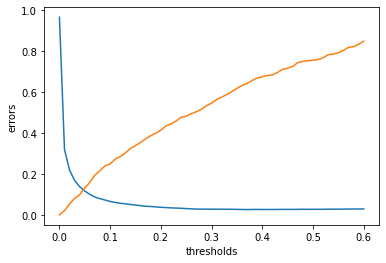

In [5]:
thresholds=[]
errors=[]
sensitivities=[]
for i in np.linspace(0.00,0.60,61):
    y_pred_lower_threshould=lda.predict_proba(X_train)[:,1]>i
    sensitivity=recall_score(y_train,y_pred_lower_threshould)
    error=1-accuracy_score(y_train,y_pred_lower_threshould)
    errors.append(error)
    thresholds.append(i)
    sensitivities.append(sensitivity)
data=pd.DataFrame({'thresholds':thresholds,'errors':errors,'sensitivities':sensitivities})
data['err_sensitivities']=1-data['sensitivities']

fig,ax=plt.subplots(1,1)
sns.lineplot(x='thresholds',y='errors',data=data,ax=ax)
sns.lineplot(x='thresholds',y='err_sensitivities',data=data,ax=ax)
plt.show()

The ROC curve is a popular graphic for simultaneously displaying the ROC curve two types of errors for all possible thresholds. The following figure displays the ROC curve for the LDA classifier on the training data. The overall performance of a classifier, summarized over all possible thresholds, is given by the area under the (ROC) curve (AUC). An ideal ROC curve will hug the top left corner, so the larger area under the (ROC) curve the AUC the better the classifier. For this data the AUC is 0.95, which is close to the maximum of one so would be considered very good. We expect a classifier that performs no better than chance to have an AUC of 0.5 (when evaluated on an independent test set not used in model training).

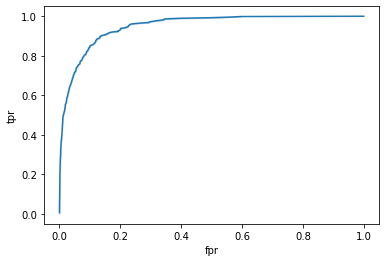

In [6]:
fpr,tpr,thresholds=roc_curve(y_train,y_prob)
data=pd.DataFrame({'fpr':fpr,'tpr':tpr}) 

fig,ax=plt.subplots(1,1)
sns.lineplot(x='fpr',y='tpr',data=data,ax=ax)
plt.show()

In [8]:
auc=roc_auc_score(y_train,y_prob)
print('auc is: %.2f '%auc)

auc is: 0.95 


As we have seen above, varying the classifier threshold changes its true positive and false positive rate. These are also called the sensitivity and one sensitivity minus the specificity of our classifier. Since there is an almost bewildering specificity array of terms used in this context, we now give a summary. Following table shows the possible results when applying a classifier (or diagnostic test) to a population.
![title](fig/fig9.png)

And the following table lists many of the popular performance measures that are used in this context. The denominators for the false positive and true positive rates are the actual population counts in each class. In contrast, the denominators for the positive predictive value and the negative predictive value are the total predicted counts for each class.
![title](fig/fig10.png)

### 4.4.4 Quadratic Discriminant Analysis

As we have discussed, LDA assumes that the observations within each class are drawn from a multivariate Gaussian distribution with a class specific mean vector and a covariance matrix that is common to all K classes. Quadratic discriminant analysis (QDA) provides an alternative approach.

Like LDA, the QDA classifier results from assuming that the observations from each class are drawn from a Gaussian distribution, and plugging estimates for the parameters into Bayes’theorem in order to perform prediction.

However, unlike LDA, QDA assumes that each class has its own covariance matrix. That is, it assumes that an observation from the kth class is of the form $X \sim N(\mu_{k}, \Sigma_{k})$, where $\Sigma_{k}$ is a covariance matrix for the kth class. Under this assumption, the Bayes classifier assigns an observation $X = x$ to the class for which:

$$
\delta_{k}(x)=x^T\Sigma^{-1}\mu_{k}-\frac{1}{2}\mu_{k}^T\Sigma_{k}^{-1}\mu_{k}+log\pi_{k}(4.23)
$$

is largest. So the QDA classifier involves plugging estimates for $\Sigma_{k}, \mu_{k}$, and $\pi_{k}$ into (4.23), and then assigning an observation X = x to the class for which this quantity is largest. Unlike in (4.19), the quantity x appears as a quadratic function in (4.23). This is where QDA gets its name.

Why does it matter whether or not we assume that the K classes share a common covariance matrix? In other words, why would one prefer LDA to
QDA, or vice-versa? The answer lies in the bias-variance trade-off. When there are p predictors, then estimating a covariance matrix requires estimating p(p+1)/2 parameters. QDA estimates a separate covariance matrix for each class, for a total of Kp(p+1)/2 parameters. With 50 predictors this is some multiple of 1,225, which is a lot of parameters. By instead assuming that the K classes share a common covariance matrix, the LDA model becomes linear in x, which means there are Kp linear coefficients to estimate. 

Consequently, LDA is a much less flexible classifier than QDA, and so has substantially lower variance. This can potentially lead to improved prediction performance. But there is a trade-off: if LDA’s assumption that the K classes share a common covariance matrix is badly off, then LDA can suffer from high bias. 

Roughly speaking, LDA tends to be a better bet than QDA if there are relatively few training observations and so reducing variance is crucial. In contrast, QDA is recommended if the training set is very large, so that the variance of the classifier is not a major concern, or if the assumption of a common covariance matrix for the K classes is clearly untenable.

The following figure illustrates the performances of LDA and QDA in two scenarios. In the left-hand panel, the two Gaussian classes have a common correlation of 0.7 between $X_{1}$ and $X_{2}$
![title](fig/fig11.png)

PS:The Bayes (purple dashed), LDA (black dotted), and QDA (green solid)

## 4.5 A Comparison of Classification Methods

In this chapter, we have considered three different classification approaches: logistic regression, LDA, and QDA. In Chapter 2, we also discussed the K-nearest neighbors (KNN) method. We now consider the types of scenarios in which one approach might dominate the others.

Though their motivations differ, the logistic regression and LDA methods are closely connected.

Consider the two-class setting with $p = 1$ predictor, and let p_{1}(x) and $p_{2}(x) = 1 - p_{1}(x)$ be the probabilities that the observation X = x belongs to class 1 and class 2, respectively. In the LDA framework, we can see from (4.12) and (4.13) (and a bit of simple algebra) that the log odds is given by:

$$
log(\frac{p_{1}(x)}{1-p_{1}(x)} )=c_{0}+c_{1}x(4.24)
$$

where $c_{0}$ and $c_{1}$ are functions of $\mu_{1}, \mu_{2}$, and $\sigma^2$. From (4.4), we know that in logistic regression,

$$
log(\frac{p_{1}}{1-p_{1}} )=\beta_{0}+\beta_{1}x(4.25)
$$

Both (4.24) and (4.25) are linear functions of x. Hence, both logistic rgression and LDA produce linear decision boundaries. The only difference between the two approaches lies in the fact that $\beta_{0}$ and $\beta_{1}$ are estimated using maximum likelihood, whereas $c_{0}$ and $c_{1}$ are computed using the estimated mean and variance from a normal distribution.

Recall from Chapter 2 that KNN takes a completely different approach from the classifiers seen in this chapter.KNN is a completely non-parametric approach: no assumptions are made about the shape of the decision boundary. Therefore, we can expect this approach to dominate LDA and logistic regression when the decision boundary is highly non-linear. On the other hand, KNN does not tell us which predictors are important.

Finally, QDA serves as a compromise between the non-parametric KNN method and the linear LDA and logistic regression approaches. Since QDA
assumes a quadratic decision boundary, it can accurately model a wider range of problems than can the linear methods. Though not as flexible
as KNN, QDA can perform better in the presence of a limited number of training observations because it does make some assumptions about the form of the decision boundary.


---------------------------------------------------------------------------------------------------------------------------------------------


To illustrate the performances of these four classification approaches, we generated data from six different scenarios.In three of the scenarios, the Bayes decision boundary is linear, and in the remaining scenarios it is non-linear. For each scenario, we produced 100 random training data sets. On each of these training sets, we fit each method to the data and computed the resulting test error rate on a large test set.
![title](fig/fig12.png)
![title](fig/fig13.png)

* Scenario 1: There were 20 training observations in each of two classes. The observations within each class were uncorrelated random normal variables with a different mean in each class.
* Scenario 2: Details are as in Scenario 1, except that within each class, the two predictors had a correlation of 0.5.
* Scenario 3: We generated X1 and X2 from the t-distribution, with t-distribution 50 observations per class.
* Scenario 4: The data were generated from a normal distribution, with a correlation of 0.5 between the predictors in the first class, and correlation of -0.5 between the predictors in the second class.
* Scenario 5: Within each class, the observations were generated from a normal distribution with uncorrelated predictors. However, the responses were sampled from the logistic function using $X_{1}^2, X_{2}^2$, and $X_{1} × X_{2}$ as predictors.
* Details are as in the previous scenario, but the responses were sampled from a more complicated non-linear function.

These six examples illustrate that no one method will dominate the others in every situation.

When the true decision boundaries are linear, then the LDA and logistic regression approaches will tend to perform well. When the boundaries are moderately non-linear, QDA may give better results. Finally, for much more complicated decision boundaries, a non-parametric approach such as KNN can be superior.

# 4.6 Lab

## 4.6.3 Linear Discriminant Analysis

Now we will perform LDA on the Smarket data. We fit the model using only the observations before 2005.

In [9]:
file=open('Smarket.csv')
Smarket=pd.read_csv(file)
file.close()
Smarket=Smarket.set_index('Year')

data_train=Smarket[Smarket.index<2005]
y_train=data_train['Direction']
X_train=data_train[['Lag1','Lag2']]

data_test=Smarket[Smarket.index==2005]
y_test=data_test['Direction']
X_test=data_test[['Lag1','Lag2']]

lda=LinearDiscriminantAnalysis().fit(X_train,y_train)
classes=lda.classes_
priors=lda.priors_
means=lda.means_
coef=lda.coef_
print('Prior probabilities of groups :')
print(classes)
print(priors)
print('Group means: (index=[Down,Up]),columns=[Lag1,Lag2]')
print(means)
print('Coeffficients: ')
print(coef)

Prior probabilities of groups :
['Down' 'Up']
[0.49198397 0.50801603]
Group means: (index=[Down,Up]),columns=[Lag1,Lag2]
[[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]
Coeffficients: 
[[-0.05544078 -0.0443452 ]]


As we observed in Section 4.5, the LDA and logistic regression predictions are almost identical.

In [11]:
y_pred=lda.predict(X_test)
print(confusion_df(lda,X_test,y_test))
print('Accuracy is: {}'.format(accuracy_score(y_test,y_pred)))

        true_0  true_1
pred_0      35      35
pred_1      76     106
Accuracy is: 0.5595238095238095


Applying a 50% threshold to the posterior probabilities allows us to recreate the predictions.

In [12]:
y_pred_threshould=(lda.predict_proba(X_test)>=0.5)[:,0]
print(y_pred_threshould.sum())
y_pred_threshould=(lda.predict_proba(X_test)<0.5)[:,0]
print(y_pred_threshould.sum())

70
182


If we wanted to use a posterior probability threshold other than 50% in order to make predictions, then we could easily do so. For instance, suppose that we wish to predict a market decrease only if we are very certain that the market will indeed decrease on that day — say, if the posterior probability is at least 90%.

In [13]:
y_pred_threshould=(lda.predict_proba(X_test)>0.9)[:,0]
print(y_pred_threshould.sum())

0


## 4.6.4 Quadratic Discriminant Analysis

We will now fit a QDA model to the Smarket data.

In [14]:
qda=QuadraticDiscriminantAnalysis().fit(X_train,y_train)
classes=qda.classes_
priors=qda.priors_
means=qda.means_

print('Prior probabilities of groups :')
print(classes)
print(priors)
print('Group means: (index=[Down,Up]),columns=[Lag1,Lag2]')
print(means)

Prior probabilities of groups :
['Down' 'Up']
[0.49198397 0.50801603]
Group means: (index=[Down,Up]),columns=[Lag1,Lag2]
[[ 0.04279022  0.03389409]
 [-0.03954635 -0.03132544]]


The output contains the group means. But it does not contain the coefficients of the linear discriminants, because the QDA classifier involves a quadratic, rather than a linear, function of the predictors.

In [15]:
y_pred=qda.predict(X_test)
print(confusion_df(qda,X_test,y_test))
print('Accuracy is: {}'.format(accuracy_score(y_test,y_pred)))

        true_0  true_1
pred_0      30      20
pred_1      81     121
Accuracy is: 0.5992063492063492
